<h2>Histogram Calculation</h2>

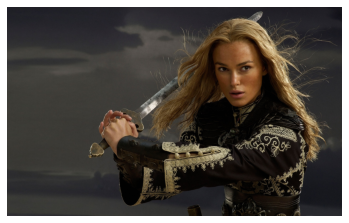

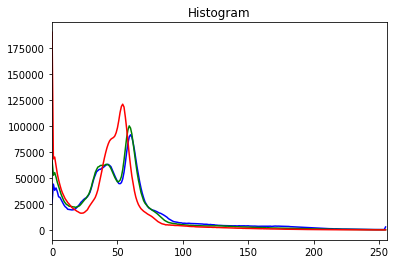

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv . imread ( 'im07.png', cv .IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
color = ( 'b','g','r' )
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt . plot(hist,color = c )
    plt.xlim ( [ 0 , 256 ] )
plt.title('Histogram')
plt.show ()

<h2>Histogram Equalization</h2>

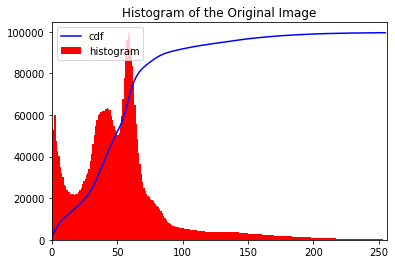

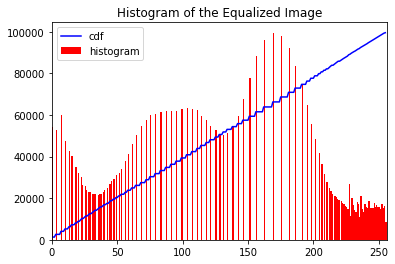

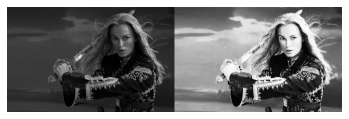

In [49]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv . imread ( 'im07.png' , cv.IMREAD_GRAYSCALE) #selecting the image

hist,bins = np . histogram ( img . ravel(), 256 , [ 0 , 256 ] ) #Getting the histogram of the original image
cdf = hist.cumsum( ) #getting the cumulative distribution of the original image
cdf_normalized = cdf * hist.max()/cdf.max()

#plotting the Cumulative distribution function and the historgam of the original image
plt.plot(cdf_normalized , color = 'b' )
plt.hist(img.flatten() , 256 , [ 0 ,256 ] , color = 'r' )
plt.xlim([0,256])
plt.legend(('cdf','histogram') , loc = 'upper left' )
plt.title( 'Histogram of the Original Image' )
plt . show ( )

equ = cv.equalizeHist(img) #Equalizing the histogram

hist , bins = np . histogram ( equ . ravel(),256,[0,256])#Getting the histogram of the equalized image
cdf = hist.cumsum() #getting the cumulative distribution of the equalized image
cdf_normalized = cdf * hist.max()/ cdf.max() #normalizing the cdf

#plotting the Cumulative distribution function and the historgam of the equalized image
plt.plot( cdf_normalized , color = 'b' )
plt.hist( equ . flatten(),256,[0,256],color = 'r')
plt.xlim( [0,256])
plt.legend( ('cdf','histogram') , loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

#plotting the original and the equalized images
res = np . hstack ( ( img , equ ) )
plt.axis('off')
plt.imshow( res , cmap= 'gray' )

<h2>Intensity Transformation</h2>

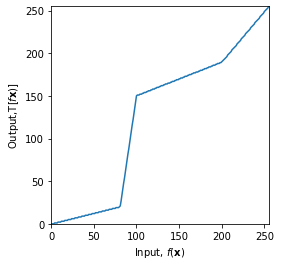

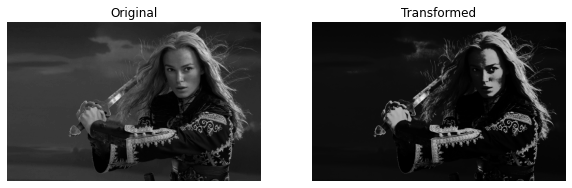

In [39]:
%matplotlib inline 
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 
img_orig=cv.imread('im07.png',cv.IMREAD_GRAYSCALE)

# introducing the transformation function
c=np.array([(80,20),(100,150),(200,190)])
t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')
transform=np.concatenate((t1,t2),axis=0).astype('uint8')
transform=np.concatenate((transform,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t4),axis=0).astype('uint8')

#transforing the image
image_transformed=cv.LUT(img_orig,transform)

#plotting the transformation function graph
fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

#plotting the original and the transformed images
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(image_transformed,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

<h2>Gamma Correction</h2>

(400, 640, 3)


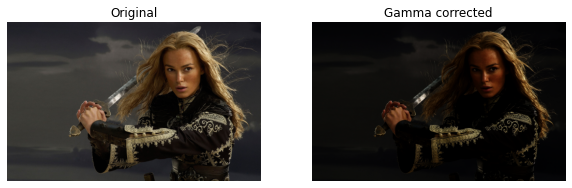

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('im07small.png', cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
print(img_orig.shape) #printing the shape of the image

gamma = 2
t = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, t) #getting the gamma corrected image

#plotting the original and the gamma corrected images
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(img_gamma)
ax[1].set_title('Gamma corrected')
ax[1].axis('off')
plt.show()

<h2>Gaussian Smoothing</h2>

uint8
255


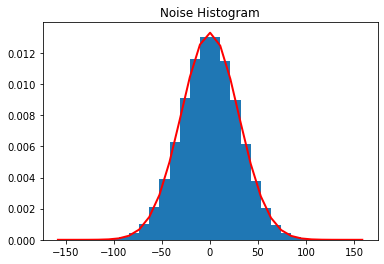

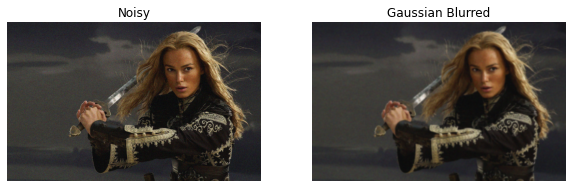

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('im07.png',cv.IMREAD_COLOR)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.dtype)
print(img.max())

#adding gaussian noise
mu = 0.0
sigma = 30
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape
gauss = np.random.normal(mu,sigma,(h,w,c))
noisy = cv.add(img, gauss, dtype = cv.CV_8UC3)

#Plotting the noise histogram
count,bins, ignored= plt.hist(gauss.ravel(), 30, density =True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/ (2*sigma**2)), linewidth= 2, color='r')
plt.title('Noise Histogram')
plt.show()

#if sigma = 1, kernel size is 3x1x2 + 1 = 7
kernel = 31
sigma = 5
blurred = cv.GaussianBlur(noisy,(kernel,kernel),sigma)

fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(noisy)
ax[0].set_title('Noisy')
ax[0].axis('off')
ax[1].imshow(blurred)
ax[1].set_title('Gaussian Blurred')
ax[1].axis('off')
plt.show()

<h2>Unsharp Masking</h2>

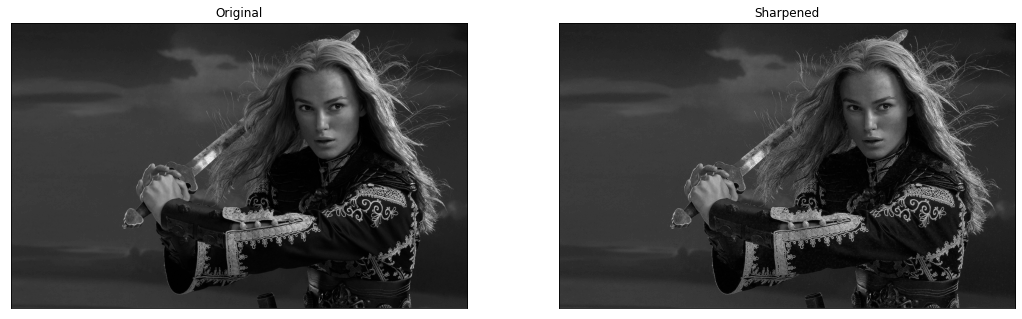

In [16]:
%matplotlib inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv.imread('im07.png', cv.IMREAD_GRAYSCALE)

kernel = np.array([(0,-1,0),(-1,5,-1),(0,-1,0)], dtype='float') 
imgc = cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

<h2>Median Filtering</h2>

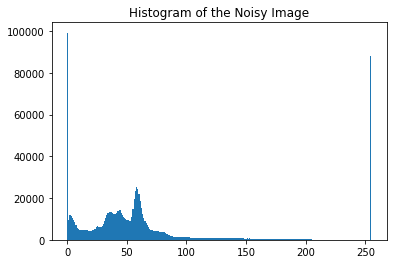

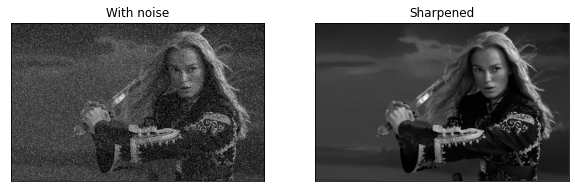

In [17]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#function to add noise to the original image
def noisy(noise_typ,image):
   if noise_typ == "s&p":
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out

img = cv.imread('im07.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn = noisy('s&p', img.astype('float32')) #adding salt and pepper noise
imf = cv.medianBlur(imn, 5) #getting the sharpened image

plt.hist(imn.ravel(), bins=256)
plt.title('Histogram of the Noisy Image')

fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(10,10))
axes[0].imshow(imn, cmap='gray')
axes[0].set_title('With noise')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imf, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

<h2>Bilateral Filtering</h2>

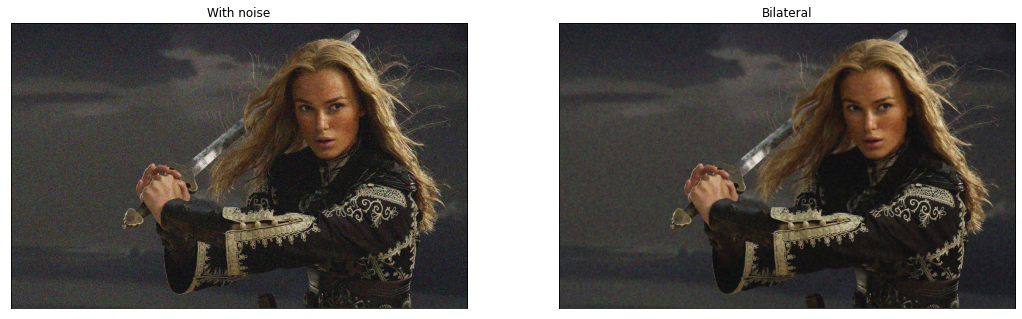

In [18]:
%matplotlib inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv.imread('im07.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#adding gaussian noise
mu = 0.0
sigma = 50
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape
gauss = np.random.normal(mu,sigma,(h,w,c))
noisy = cv.add(img, gauss, dtype = cv.CV_8UC3)

#bilateral filtering
bilateral = cv.bilateralFilter(noisy,15,75,75)


fig,axes=plt.subplots(1,2, sharex='all', sharey="all", figsize=(18,18))
axes[0].imshow(noisy, cmap='gray')
axes[0].set_title('With noise')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(bilateral, cmap='gray')
axes[1].set_title('Bilateral')
axes[1].set_xticks([]),axes[1].set_yticks([])

plt.show()

<h2>Counting Rice Grains</h2>

101


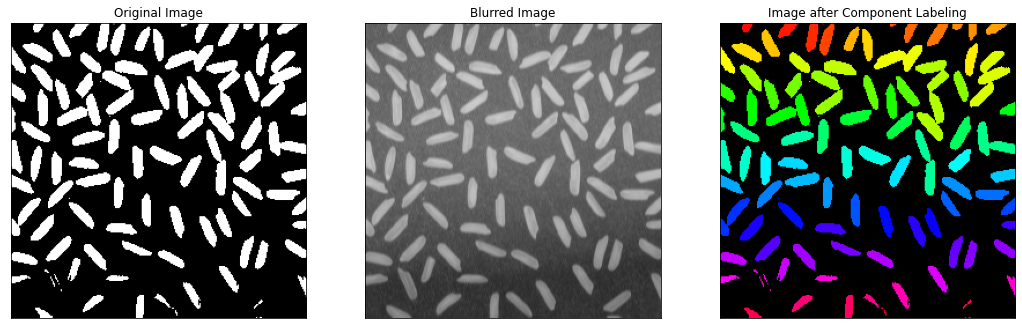

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def counting_rice_grains(path):
    
    #input image
    img0 = cv.imread(path, 0)
    
    blurred = cv.GaussianBlur(img0, (3,3), 0.35,0.35,cv2.BORDER_REPLICATE)
    
    # Converting the pixels with values 1-127 to 0 and others to 1
    img = cv.threshold(blurred, 127, 255, cv2.THRESH_BINARY)[1] 
    grains, labels = cv.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # Converting to BGR
    labeled_img = cv.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    print(grains)

    fig,axes=plt.subplots(1,3, sharex='all', sharey="all", figsize=(18,18))
    axes[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].set_xticks([]),axes[0].set_yticks([])
    axes[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB), cmap='gray')
    axes[1].set_title('Blurred Image')
    axes[1].set_xticks([]),axes[1].set_yticks([])
    axes[2].imshow(cv.cvtColor(labeled_img, cv.COLOR_BGR2RGB), cmap='gray')
    axes[2].set_title('Image after Component Labeling')
    axes[2].set_xticks([]),axes[1].set_yticks([])

counting_rice_grains('rice.png')